In [30]:
import pandas as pd
import numpy as np

# Reading the dataset from csv

In [31]:
df=pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [32]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# checking for unique values in all columns 

In [33]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


# checking for any nulls

In [34]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


# analysis on data

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

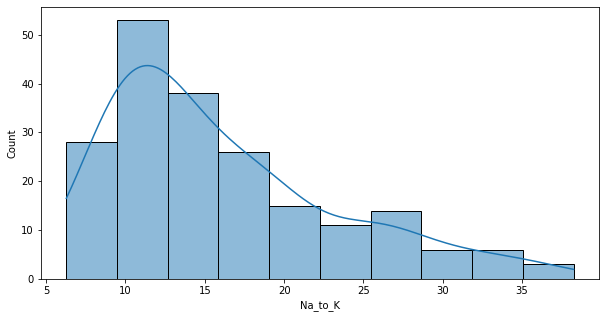

In [36]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df,x= 'Na_to_K',bins=10,kde=True,ax=ax)

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

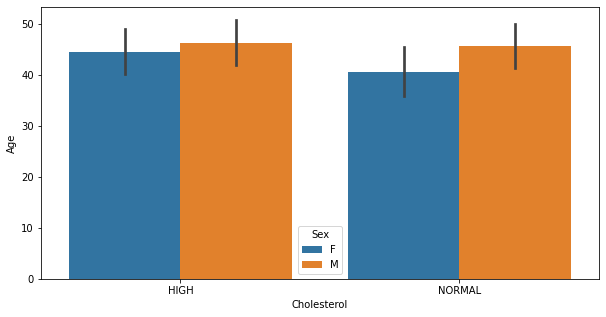

In [37]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='Cholesterol',y='Age',hue='Sex',ax=ax)

<AxesSubplot:xlabel='Drug', ylabel='count'>

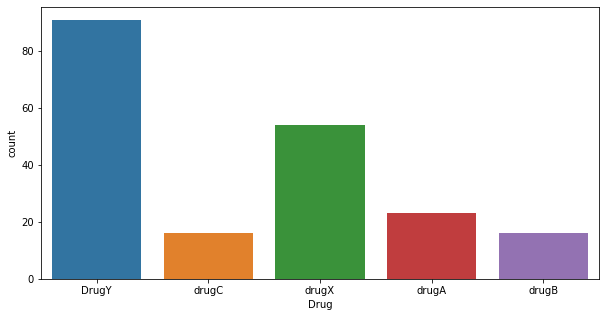

In [38]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='Drug',ax=ax)

In [39]:
Drug_sex_df=df.groupby(['Drug','Sex']).size().reset_index(name='count')
Drug_sex_df

,Drug,Sex,count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


<AxesSubplot:xlabel='Drug', ylabel='count'>

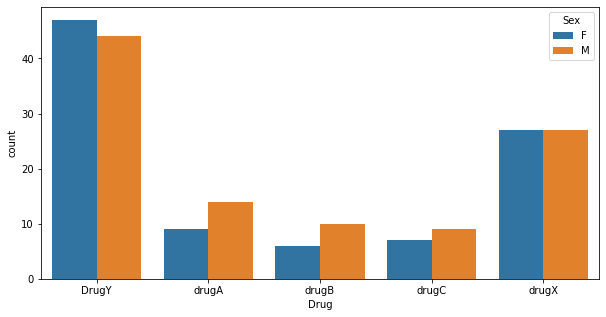

In [40]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=Drug_sex_df,x='Drug',y='count',hue='Sex',ax=ax)

    Drug      BP  count
0  DrugY    HIGH     38
1  DrugY     LOW     30
2  DrugY  NORMAL     23
3  drugA    HIGH     23
4  drugB    HIGH     16
5  drugC     LOW     16
6  drugX     LOW     18
7  drugX  NORMAL     36


<AxesSubplot:xlabel='Drug', ylabel='count'>

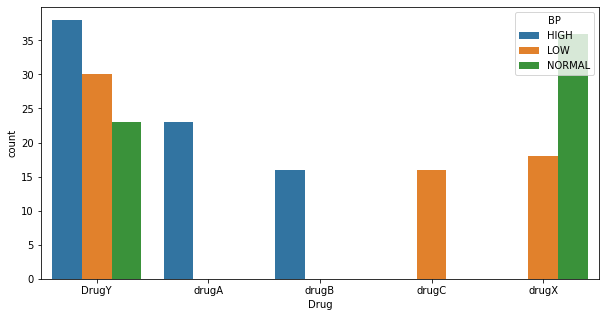

In [41]:
Drug_BP_df=df.groupby(['Drug','BP']).size().reset_index(name='count')
print(Drug_BP_df)
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=Drug_BP_df,x='Drug',y='count',hue='BP',ax=ax)

    Drug Cholesterol  count
0  DrugY        HIGH     47
1  DrugY      NORMAL     44
2  drugA        HIGH     12
3  drugA      NORMAL     11
4  drugB        HIGH      8
5  drugB      NORMAL      8
6  drugC        HIGH     16
7  drugX        HIGH     20
8  drugX      NORMAL     34


<AxesSubplot:xlabel='Drug', ylabel='count'>

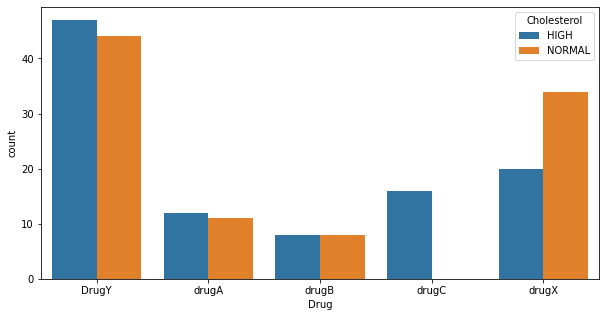

In [42]:
Drug_Cholesterol_df=df.groupby(['Drug','Cholesterol']).size().reset_index(name='count')
print(Drug_Cholesterol_df)
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=Drug_Cholesterol_df,x='Drug',y='count',hue='Cholesterol',ax=ax)

# Dividing Data Into Training and Testing

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Drug'],axis=1),df['Drug'],test_size=0.2)
len(X_test)

40

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer=ColumnTransformer(transformers=[
    ('Transform1',OneHotEncoder(sparse=False,drop='first'),['Sex','BP','Cholesterol'])
],remainder='passthrough')

In [62]:
X_train=transformer.fit_transform(X_train)
X_train


array([[ 1.   ,  0.   ,  1.   ,  0.   , 25.   , 19.011],
       [ 1.   ,  1.   ,  0.   ,  0.   , 47.   , 13.093],
       [ 1.   ,  0.   ,  0.   ,  1.   , 22.   , 28.294],
       [ 0.   ,  1.   ,  0.   ,  0.   , 48.   , 15.036],
       [ 1.   ,  1.   ,  0.   ,  0.   , 53.   , 22.963],
       [ 0.   ,  0.   ,  0.   ,  0.   , 73.   , 18.348],
       [ 1.   ,  0.   ,  1.   ,  0.   , 56.   ,  8.966],
       [ 0.   ,  1.   ,  0.   ,  0.   , 32.   ,  9.712],
       [ 0.   ,  0.   ,  0.   ,  1.   , 68.   , 10.189],
       [ 1.   ,  0.   ,  1.   ,  0.   , 23.   , 16.85 ],
       [ 0.   ,  0.   ,  0.   ,  0.   , 58.   , 19.416],
       [ 0.   ,  1.   ,  0.   ,  1.   , 32.   , 10.84 ],
       [ 0.   ,  0.   ,  1.   ,  0.   , 59.   , 13.884],
       [ 1.   ,  1.   ,  0.   ,  1.   , 43.   , 19.368],
       [ 1.   ,  0.   ,  1.   ,  1.   , 46.   ,  7.285],
       [ 0.   ,  0.   ,  0.   ,  0.   , 23.   , 25.355],
       [ 0.   ,  0.   ,  0.   ,  1.   , 21.   , 28.632],
       [ 1.   ,  0.   ,  0.   ,

In [63]:
X_test=transformer.transform(X_test)
X_test

array([[ 1.   ,  0.   ,  0.   ,  1.   , 60.   ,  8.621],
       [ 1.   ,  0.   ,  1.   ,  0.   , 34.   , 22.456],
       [ 1.   ,  0.   ,  0.   ,  1.   , 49.   ,  6.269],
       [ 0.   ,  1.   ,  0.   ,  1.   , 40.   , 11.349],
       [ 0.   ,  1.   ,  0.   ,  1.   , 38.   , 29.875],
       [ 0.   ,  1.   ,  0.   ,  1.   , 42.   , 29.271],
       [ 0.   ,  0.   ,  1.   ,  1.   , 50.   , 12.295],
       [ 1.   ,  0.   ,  0.   ,  0.   , 43.   , 13.972],
       [ 1.   ,  0.   ,  1.   ,  1.   , 43.   , 12.859],
       [ 1.   ,  1.   ,  0.   ,  1.   , 67.   , 20.693],
       [ 0.   ,  1.   ,  0.   ,  0.   , 47.   , 11.767],
       [ 0.   ,  1.   ,  0.   ,  0.   , 74.   , 20.942],
       [ 0.   ,  0.   ,  0.   ,  0.   , 35.   , 12.894],
       [ 1.   ,  0.   ,  1.   ,  1.   , 55.   ,  7.261],
       [ 1.   ,  0.   ,  0.   ,  1.   , 32.   ,  9.445],
       [ 1.   ,  0.   ,  1.   ,  1.   , 60.   , 10.091],
       [ 1.   ,  1.   ,  0.   ,  1.   , 37.   , 16.724],
       [ 0.   ,  0.   ,  1.   ,

# Building The Model Without Parameter Tuning

In [67]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [70]:
svm=SVC()
svm.fit(X_train,Y_train)
result=svm.predict(X_test)
l=metrics.accuracy_score(Y_test,result)
l

0.675

In [72]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
result=knn.predict(X_test)
l=metrics.accuracy_score(Y_test,result)
l

0.65

In [73]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
result=rf.predict(X_test)
l=metrics.accuracy_score(Y_test,result)
l

1.0

In [ ]:
GridSearchCV()

# With GridSearch for Svm

In [75]:
from sklearn.model_selection import GridSearchCV


In [83]:
Hyperparameters={'C':[1,2,3]
                ,'kernel':['linear','poly','rbf','sigmoid']
                ,'degree':[2,3,4]
                }
Hyperparameters

{'C': [1, 2, 3],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': [2, 3, 4]}

In [84]:
grid_svc=GridSearchCV(estimator=svm
                     ,param_grid=Hyperparameters
                     ,cv=5
                     ,verbose=2
                     ,n_jobs=-1)

In [85]:
grid_svc.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [86]:
grid_svc.best_params_

{'C': 1, 'degree': 2, 'kernel': 'linear'}

In [87]:
grid_svc.best_score_

0.9875

In [88]:
grid_svc.fit(X_test,Y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [89]:
grid_svc.best_score_

0.85

# GridSearch For RandomForest

In [90]:
Hyperparameters={'n_estimators':[50,100,150,200]
                ,'criterion':['gini','entropy']
                }
Hyperparameters

{'n_estimators': [50, 100, 150, 200], 'criterion': ['gini', 'entropy']}

In [91]:
grid_rf=GridSearchCV(estimator=rf
                     ,param_grid=Hyperparameters
                     ,cv=5
                     ,verbose=2
                     ,n_jobs=-1)

In [94]:
grid_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [96]:
grid_rf.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [97]:
grid_rf.best_score_

0.9875

In [98]:
grid_rf.fit(X_test,Y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [99]:
grid_rf.best_score_

0.875

# GridSearch for Knn

In [100]:
Hyperparameters={'n_neighbors':[3,5,7,10]
                ,'weights':['uniform','distance']
                }
Hyperparameters

{'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}

In [101]:
grid_knn=GridSearchCV(estimator=knn
                     ,param_grid=Hyperparameters
                     ,cv=5
                     ,verbose=2
                     ,n_jobs=-1)

In [102]:
grid_knn.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [103]:
grid_knn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [108]:
grid_knn.best_score_

0.6

In [107]:
grid_knn.fit(X_test,Y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [109]:
grid_knn.best_score_

0.6